In [1]:
!pip install --upgrade fastai

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/site-packages (1.0.53.post2)
Requirement not upgraded as not directly required: torch>=1.0.0 in /usr/local/lib/python3.6/site-packages (from fastai) (1.1.0)
Requirement not upgraded as not directly required: packaging in /usr/local/lib/python3.6/site-packages (from fastai) (19.0)
Requirement not upgraded as not directly required: fastprogress>=0.1.19 in /usr/local/lib/python3.6/site-packages (from fastai) (0.1.21)
Requirement not upgraded as not directly required: pyyaml in /usr/local/lib/python3.6/site-packages (from fastai) (3.13)
Requirement not upgraded as not directly required: matplotlib in /usr/local/lib/python3.6/site-packages (from fastai) (3.0.2)
Requirement not upgraded as not directly required: Pillow in /usr/local/lib/python3.6/site-packages (from fastai) (5.4.0)
Requirement not upgraded as not directly required: typing in /usr/local/lib/python3.6/site-packages (from fastai) (3.6.6)
Requirement not upgraded

In [2]:
!pip install --upgrade torch torchvision

Requirement already up-to-date: torch in /usr/local/lib/python3.6/site-packages (1.1.0)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/site-packages (0.3.0)
Requirement not upgraded as not directly required: numpy in /usr/local/lib/python3.6/site-packages (from torch) (1.15.4)
Requirement not upgraded as not directly required: six in /usr/local/lib/python3.6/site-packages (from torchvision) (1.12.0)
Requirement not upgraded as not directly required: pillow>=4.1.1 in /usr/local/lib/python3.6/site-packages (from torchvision) (5.4.0)
menpo 0.8.1 has requirement matplotlib<2.0,>=1.4, but you'll have matplotlib 3.0.2 which is incompatible.
menpo 0.8.1 has requirement pillow<5.0,>=3.0, but you'll have pillow 5.4.0 which is incompatible.
menpo 0.8.1 has requirement scipy<1.0,>=0.16, but you'll have scipy 1.2.0 which is incompatible.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' 

In [3]:
!pip install pretrainedmodels

menpo 0.8.1 has requirement matplotlib<2.0,>=1.4, but you'll have matplotlib 3.0.2 which is incompatible.
menpo 0.8.1 has requirement pillow<5.0,>=3.0, but you'll have pillow 5.4.0 which is incompatible.
menpo 0.8.1 has requirement scipy<1.0,>=0.16, but you'll have scipy 1.2.0 which is incompatible.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
import os

os.chdir(os.pardir)

%reload_ext autoreload
%autoreload 2

In [5]:
from src.dataloaders.data_loader import DataLoader
from src.trainers.trainer import Trainer
from src.evaluators.evaluator import Evaluator

# Hyperparameters

In [6]:
EXP_NAME = 'dpn92'

BATCH_SIZE = 50

N_EPOCHS_1 = 30
LR_1 = 1e-2

N_EPOCHS_2 = 20
LR_2 = slice(1e-5, 1e-3)

# Import Model

In [7]:
from src.models.dpn92 import DPN92

In [8]:
model = DPN92()

In [9]:
model_config = model.get_model_config()
img_stats = model.get_img_stats()
img_size = model.get_img_size()

# Load Data

In [10]:
data_loader = DataLoader()
data_bunch = data_loader.get_data_bunch(img_size=img_size, img_stats=img_stats, batch_size=BATCH_SIZE)

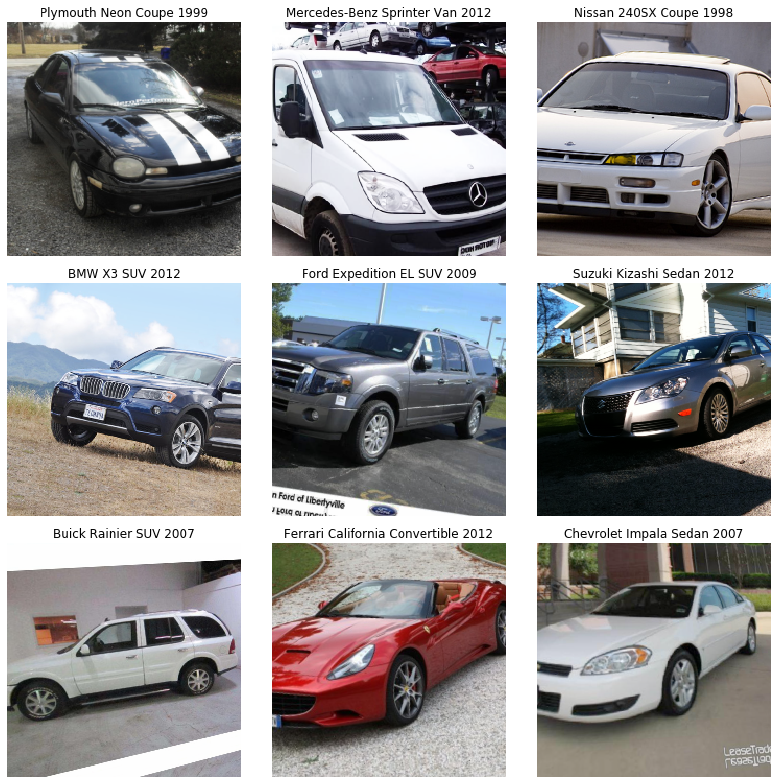

In [19]:
data_bunch.show_batch(rows=3, figsize=(11,11))

# Begin Training

In [11]:
trainer = Trainer(
    data_bunch=data_bunch, 
    mixup=True, 
    exp_name=EXP_NAME,
    **model_config)

## Stage-1: Transfer Learning

Only train the classifier head first.

In [22]:
import torch
torch.cuda.empty_cache()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.25E-03
Min loss divided by 10: 3.98E-03


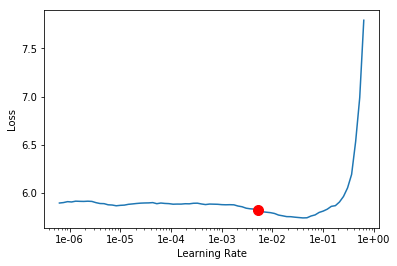

In [12]:
trainer.lr_find(freeze=True)

In [13]:
trainer.learn.recorder.min_grad_lr

0.005248074602497722

In [14]:
trainer.train(n_epochs=N_EPOCHS_1, max_lr=LR_1, freeze=True, name='1_30e')

Better model found at epoch 0 with valid_loss value: 3.9548897743225098.
Better model found at epoch 1 with valid_loss value: 2.8598239421844482.
Better model found at epoch 2 with valid_loss value: 2.3039333820343018.
Better model found at epoch 3 with valid_loss value: 2.0964720249176025.
Better model found at epoch 8 with valid_loss value: 2.069751262664795.
Better model found at epoch 9 with valid_loss value: 1.9237254858016968.
Better model found at epoch 10 with valid_loss value: 1.7621978521347046.
Better model found at epoch 11 with valid_loss value: 1.5181928873062134.
Better model found at epoch 12 with valid_loss value: 1.3714802265167236.
Better model found at epoch 14 with valid_loss value: 1.233616828918457.
Better model found at epoch 16 with valid_loss value: 1.0106532573699951.
Better model found at epoch 17 with valid_loss value: 0.998397707939148.
Better model found at epoch 18 with valid_loss value: 0.8693789839744568.
Better model found at epoch 19 with valid_loss 

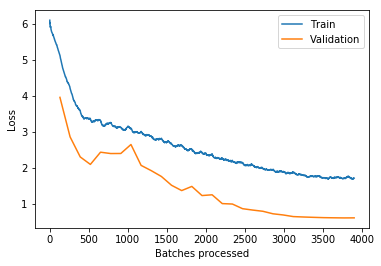

In [15]:
trainer.plot_losses()

## Stage-2: Fine-tuning

Unfreeze all layers and train with discriminative layer training.

In [12]:
trainer.load_weights('1_30e')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 5.75E-07


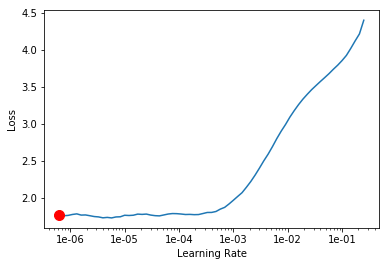

In [16]:
trainer.lr_find(freeze=False)

In [17]:
trainer.train(n_epochs=N_EPOCHS_2, max_lr=LR_2, freeze=False, name='2_20e')

Better model found at epoch 0 with valid_loss value: 0.6188892126083374.
Better model found at epoch 10 with valid_loss value: 0.5596067309379578.
Better model found at epoch 11 with valid_loss value: 0.5553651452064514.
Better model found at epoch 12 with valid_loss value: 0.5415031909942627.
Better model found at epoch 13 with valid_loss value: 0.5253592729568481.
Better model found at epoch 14 with valid_loss value: 0.49841517210006714.
Better model found at epoch 15 with valid_loss value: 0.49465352296829224.
Better model found at epoch 16 with valid_loss value: 0.4908011853694916.
Better model found at epoch 17 with valid_loss value: 0.4834718406200409.
Better model found at epoch 18 with valid_loss value: 0.4820881485939026.
Better model found at epoch 19 with valid_loss value: 0.47605758905410767.


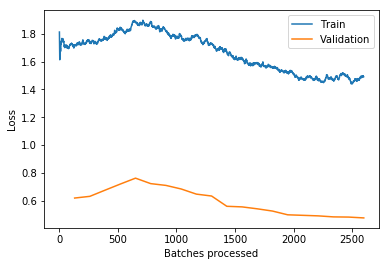

In [18]:
trainer.plot_losses()

## Export Learner/Model

In [19]:
trainer.export()

# Evaluation

In [22]:
interp = ClassificationInterpretation.from_learner(trainer.learn)

NameError: name 'ClassificationInterpretation' is not defined

In [ ]:
most_confused = interp.most_confused()

In [ ]:
most_confused

In [22]:
evaluator = Evaluator(
    learn_name=EXP_NAME,
    tta=False,
    exp_name=EXP_NAME
)

In [20]:
evaluator = Evaluator(
    learn_name=EXP_NAME,
    tta=True,
    exp_name=(EXP_NAME + '_tta')
)

In [23]:
evaluator.get_metrics()

(0.8775027981594329,
 0.8775027981594329,
 0.8775027981594329,
 0.8775027981594329)